In [59]:
%matplotlib widget 

In [1]:
import numpy as np
from numpy import loadtxt
import pandas as pd
import time
import matplotlib
import matplotlib.pyplot as plt
import pyvisa as visa
from matplotlib import animation
from time import sleep
from matplotlib.animation import FuncAnimation
#Importing the functions from the module and the pulses dictionaries
from Sweeping import *
from Dictionaries import *
from PulseFiles import *
from Instrument import *
import pyqtgraph as pg 
import nidaqmx
import pickle

# Instrument settings and CSV file path Dictionary

In [17]:
AWG_Settings= {
    'Visa Resource Name': 'TCPIP0::ibn3-036.ibn-net.kfa-juelich.de::hislip0::INSTR',
    'Voltage Amplitude':700,
    'Clock Sample Frecuency':3000000000,
    'Output_Channel': 1,
    'Mode': 'STS',
    'Trigger In Threshold' : 1,
    'Output Rout': 'DAC', #DAC output rout only has the BNC outputs: Direct Out and (Averaged) Direct Out
    'Data Directory': r'D:\Alejandro\Pulses\diode measurements\Pulse Scheme CSV\Measurements\1ms'
}

In [18]:
M8190A = VisaR(AWG_Settings,60000)

In [16]:
M8190A.query('SYST:ERR?')

'0,"No error"'

In [19]:
Initialization(M8190A,AWG_Settings)

Instruments Sampling Frecuency set to 3.00000000000000E+09Hz
Instruments Direct Out DAC Output route Voltage set to 7.00000000000000E-01Volts
AWG_Settings_Dict set to TRIGGERED Mode
Trigger In threshold value set to 1.00000000000000E+00V


In [38]:
M8190A.write('SEQ:DEL:ALL')

12

# Pulses Dictionaries

In [20]:
Pump = {
    'Name':'Pump',
    'Amplitude':40,
    'Start time':5,
    'End time':2e-10,
    'Start Duration':1,
    'End Duration':1,
    'Sweep time':0,
    'Sweep Duration':0
}

In [21]:
ProbeA = {
    'Name':'ProbeA',
    'Amplitude':25,
    'Start time':3,
    'End time':7,
    'Start Duration':1,
    'End Duration':60,
    'Sweep time':1,
    'Sweep Duration':0
}

In [22]:
ProbeB = {
    'Name':'ProbeB',
    'Amplitude':0,
    'Start time':0,
    'End time':12,
    'Start Duration':1,
    'End Duration':6,
    'Sweep time':0,
    'Sweep Duration':0
}

# Pulse Schemes Dictionaries and measurement path file

In [23]:
PulseScheme_A =  {
    'Name' : 'PulseScheme_A',
    'Pulse Scheme': [Pump,ProbeA],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\TList\1ms,50Hz'
}

In [24]:
PulseScheme_B  = {
    'Name' : 'PulseScheme_B',
    'Pulse Scheme': [ProbeB,ProbeB],
    'Number of repetitions': 1,
    'Measurement file Path': r'D:\Alejandro\Pulses\diode measurements\TList\1ms,50Hz'
}

In [10]:
PulseScheme_A['Measurement file Path']

'D:\\Alejandro\\Pulses\\diode measurements\\TList\\1ms,50Hz'

# Number of Samples given the AWG Sampling rate and the Reference Signal Frequency
## Sr = 3Ghz , t = 10ms 

In [9]:
sam = int(3e9*10e-3)

#sam /480

#M8190A.write('FREQ:RAST 6000000000')

In [12]:
sam

30000000

In [10]:
pul2 = Sweep(PulseScheme_B['Pulse Scheme'],10,0,10,sam)

In [79]:
%matplotlib inline

In [8]:
%matplotlib widget 

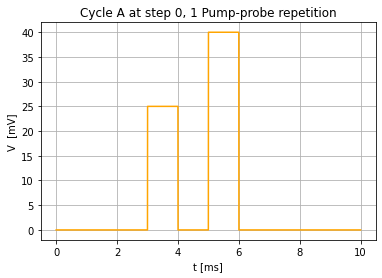

In [11]:
step = 0
pul1 = Sweep_teil(PulseScheme_A,30,step,10,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}, {r} Pump-probe repetition'.format(a = step, r = PulseScheme_A['Number of repetitions'])) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
fig.savefig('Cycle A, Probe width 1ms 50Hz step 0, centered 2.jpeg',bbox_inches='tight')

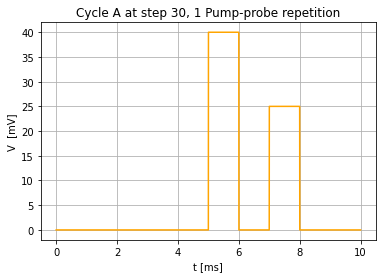

In [12]:
step = 30
pul1 = Sweep_teil(PulseScheme_A,30,step,10,sam)


#Plot
fig,ax= plt.subplots()
ax.grid(True)

plt.plot(pul1[1],pul1[0],label= '{b} samples'.format(b = sam),color='orange')

ax.set_ylabel('V  [mV]')
ax.set_xlabel(r't [ms]')
ax.set_title('Cycle A at step {a}, {r} Pump-probe repetition'.format(a = step, r = PulseScheme_A['Number of repetitions'])) #Voltage Offset = 3mV, Marker Ampl = 50mV 
#ax.legend(loc=0)
#plt.legend(bbox_to_anchor=(2.05, 1), loc='upper left', borderaxespad=0.)
plt.show()
fig.savefig('Cycle A, Probe width 1ms 50Hz step 30, centered 2.jpeg',bbox_inches='tight')

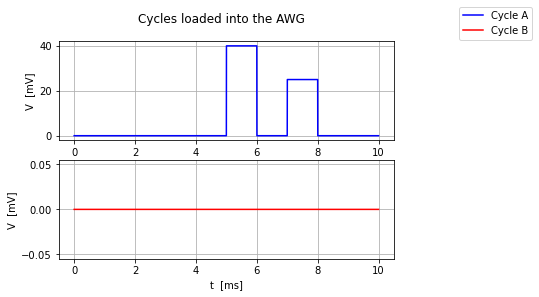

In [13]:
step = 30

#pul1 = Sweep_teil(PulseScheme_AutocorrelationA,30,step,5000,sam)


fig,ax= plt.subplots(2)


ax[0].grid(True)
ax[1].grid(True)
fig.suptitle('Cycles loaded into the AWG')


ax[0].plot(pul1[1],pul1[0],label= 'Cycle A',color='blue')
ax[1].plot(pul2[1],pul2[0],label= 'Cycle B',color='red')
ax[0].set_ylabel('V  [mV]')
ax[0].set_xlabel(r't  [$\mu$s]')
ax[1].set_ylabel('V  [mV]')
ax[1].set_xlabel(r't  [ms]')

#ax.set_title('Pulses Loaded into the AWG')

fig.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

fig.savefig('Pulse_scheme_20ms centered,2')

# Dummy File Loading

In [25]:
def Dummy_File(instrument):
    """function that loads an empty pulse file to the AWG. The current file location is given in file
    
        This function calls the Segment_file function to load the given csv file into the AWG.
        It firts changes the sequencing mode to arbitrary (since the initialization function sets it to sequencing),
        then the file is loaded, the sequencing is initiated and triggered. It now follows a wait time of 5 seconds.
        Finally the sequencing is stopped and the mode is changed back to sequence and the waveform is deleted in the AWG.

        instrument : refers to the object class given by pyvisa (through the function Visa in this module)
    """
    file = r'D:\\Alejandro\\Pulses\\Dict\\S5\\SegmentB_30000000_0.csv'
    instrument.write('FUNC1:MODE ARB')
    Segment_File(instrument,file,1)
    instrument.write('INNIT:IMM')
    instrument.write('TRIG:BEG1 ')
    time.sleep(5)
    instrument.write('ABOR')
    instrument.write(':FUNC1:MODE STS')
    instrument.write('TRAC:DEL:ALL')

In [ ]:
Dummy_File(M8190A)

In [26]:
M8190A.write('TRAC:DEL:ALL')
M8190A.write('SEQ:DEL:ALL')

12

In [35]:
M8190A.write('SEQ:DEL:ALL')

12

In [14]:
sweeping_run_a = Sweeping_Single_List_File_teil(PulseScheme_A,30,10,sam,0,30,AWG_Settings,'A')[0]

In [15]:
sweeping_runb = Sweeping_Single_List_File_teil(PulseScheme_B,30,10,sam,0,30,AWG_Settings,'B')[0]

In [16]:
#exporting pickle 

pickle.dump(sweeping_run_a, open(r"{dict}\cycleA_31steps_10ms_1ms_probe_3GHz.p".format(dict = PulseScheme_A['Measurement file Path']), "wb"))  # save it into a file named sweepingA.p
pickle.dump(sweeping_runb, open(r"{dict}\cycleB_31steps_10ms_1msprobe_3Ghz.p".format(dict = PulseScheme_A['Measurement file Path']), "wb"))  # save it into a file named sweepingB.p

<ipython-input-16-3f473d6d848d>:3: ResourceWarning: unclosed file <_io.BufferedWriter name='D:\\Alejandro\\Pulses\\diode measurements\\TList\\1ms,50Hz\\cycleA_31steps_10ms_1ms_probe_3GHz.p'>
  pickle.dump(sweeping_run_a, open(r"{dict}\cycleA_31steps_10ms_1ms_probe_3GHz.p".format(dict = PulseScheme_A['Measurement file Path']), "wb"))  # save it into a file named sweepingA.p
<ipython-input-16-3f473d6d848d>:4: ResourceWarning: unclosed file <_io.BufferedWriter name='D:\\Alejandro\\Pulses\\diode measurements\\TList\\1ms,50Hz\\cycleB_31steps_10ms_1msprobe_3Ghz.p'>
  pickle.dump(sweeping_runb, open(r"{dict}\cycleB_31steps_10ms_1msprobe_3Ghz.p".format(dict = PulseScheme_A['Measurement file Path']), "wb"))  # save it into a file named sweepingB.p


In [25]:
#importing pickle

#sweeping_run_a = pickle.load(open(r"{dict}\cycleA_31steps_10ms_1ms_probe_3GHz.p".format(dict = PulseScheme_A['Measurement file Path'])),"rb"))

sweeping_runb =  pickle.load(open(r"{dict}\cycleB_31steps_10ms_1msprobe_3Ghz.p".format(dict = PulseScheme_A['Measurement file Path']),"rb"))

<ipython-input-25-cba27b11ad38>:5: ResourceWarning: unclosed file <_io.BufferedReader name='sweepingB_30steps_10ms_1msprobe.p'>
  sweeping_runb=  pickle.load(open("sweepingB_30steps_10ms_1msprobe.p","rb"))


In [28]:
sweeping_run_a

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentA_30000000_6.csv',
 'Puls

In [27]:
sweeping_runb

{'Pulse File Location, at step 0': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_0.csv',
 'Pulse File Location, at step 1': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_1.csv',
 'Pulse File Location, at step 2': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_2.csv',
 'Pulse File Location, at step 3': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_3.csv',
 'Pulse File Location, at step 4': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_4.csv',
 'Pulse File Location, at step 5': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_5.csv',
 'Pulse File Location, at step 6': 'D:\\Alejandro\\Pulses\\diode measurements\\Pulse Scheme CSV\\Measurements\\1ms\\SegmentB_30000000_6.csv',
 'Puls

In [29]:
PulseScheme_A['Measurement file Path']

'D:\\Alejandro\\Pulses\\diode measurements\\TList\\1ms,50Hz'

In [57]:
M8190A.write('SEQ:DEL:ALL')

12

In [58]:
Lock_In_Settings = {
'Time Constant' : '300ms',
'Sensitivity' : '500 microVolts',
'Reserve' : 'Normal',
'db' : 24,
'Modulation': '50Hz'
}

In [63]:
playing_time = 10 #in seconds

Diode_Signal, averaged_data = Measurement_Autocorrelation_voltage(M8190A,DAQ_Settings1,1000, playing_time ,sweeping_run_a,sweeping_runb,PulseScheme_A['Measurement file Path'],Lock_In_Settings)

Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 0
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 1
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 2
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 3
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse Stoped
Data acquired for Step 4
Sequence loaded with the following segment data "1,1,0,1,0,29999999,2,1,0,1,0,29999999" and the advancement method is COND
Triggering Pulse 

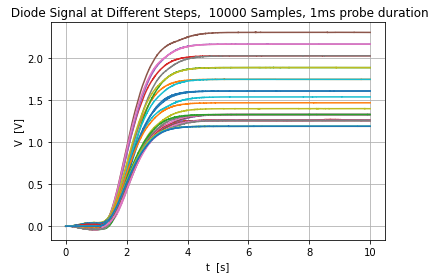

In [64]:
fig,ax= plt.subplots()
ax.grid(True)
for i in range(0,len(Diode_Signal)):
    plt.plot(Diode_Signal[i][1],Diode_Signal[i][0],label= 'Step {st}'.format(st = i ))

ax.set_ylabel(r'V  [V]')
ax.set_xlabel('t  [s]')
ax.set_title(r' Diode Signal at Different Steps,  {b} Samples, 1ms probe duration'.format(b = len(Diode_Signal[0][1]) ))
#ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#ax.legend(loc=0)
plt.show()
fig.savefig(r'{loc}\Diode Signal time cstant = {a}, sensitivity {b},{c} daqseconds, 10ms scheme, probe duration 1ms,31 steps, no legend,3Ghz .jpeg'.format(loc = PulseScheme_A['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time),bbox_inches='tight')

In [34]:
time_delay = np.linspace(-2,2,31)

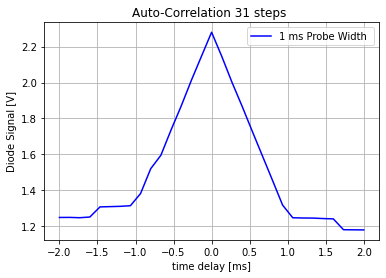

In [65]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,averaged_data,label=r'1 ms Probe Width ',color='blue')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [ms]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 31 steps ')

axes.legend(loc = 0)
plt.show()

fig.savefig(r'{loc}\Autocorrelation function 31 steps probes 10m length tc = {a}, sens {b} centered {c}s DAQ 3Ghz.jpeg'.format(loc = PulseScheme_A['Measurement file Path'],a = Lock_In_Settings['Time Constant'], b = Lock_In_Settings['Sensitivity'], c = playing_time ))

In [24]:
avrloadtest = loadtxt('averaged signal_30steps_1micro_20sdaqtime_200rep.csv',delimiter= ",")

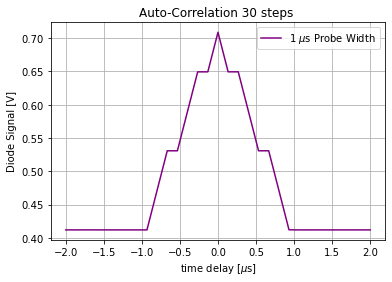

In [25]:
#change this to V regime
fig,axes = plt.subplots()

axes.grid(True)

plt.plot(time_delay,avrloadtest,label=r'1 $\mu$s Probe Width ',color='purple')
#plt.plot(tm,pul,label = '{a} samples'.format(a = len(pul)))

axes.set_xlabel(r'time delay [$\mu$s]')
axes.set_ylabel(r'Diode Signal [V]')
axes.set_title('Auto-Correlation 30 steps ')

axes.legend(loc = 0)
plt.show()

#fig.savefig(r'{loc}\Autocorrelation function 30 steps 600reps 1micro probe20s_200rep.jpeg'.format(loc = location),bbox_inches='tight')

# Aux Settings Amp = 170 mv and offset = 10mV
# main settings Amp = 700mv and Offset =  30mv ?
trigged:  mrk ampl = 3.56V, off = -1.56V with;
off: mrkr ampl = 0, offset = -1.52V



# Aux Settings Amp = 40 mv and offset = 0 V

# main settings Amp = 700mv and Offset =  0 V
trigged:  mrk ampl = 1V, off = -500mV ;

off: mrkr ampl = 0, offset = -500mV

